# Notebook for visualising spectra

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import the calculated spectra

In [2]:
def get_spectrum(filename):
    energies = []
    fluxes = []

    for line in open(filename):
        if not line.startswith("#"):
            line=line.strip("\n")
            lineParts=line.split(",")
            energies.append(float(lineParts[0]))
            fluxes.append(float(lineParts[1]))
    
    return (np.array(energies), np.array(fluxes))

In [3]:
TRIGA_flux = get_spectrum('spectra/TRIGA_flux.text')
Kaixuan_flux = get_spectrum('spectra/Kaixuan_flux.text')
HFIR_flux = get_spectrum('spectra/HFIR_flux.text')

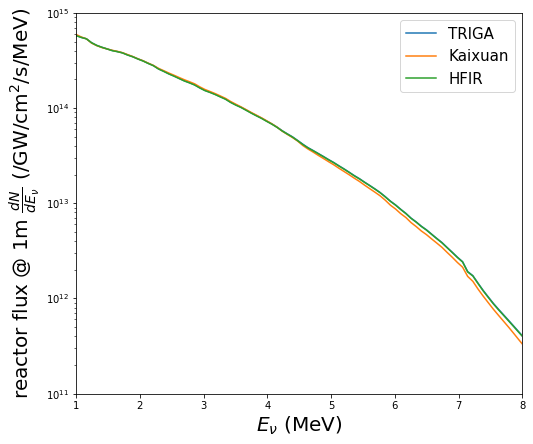

In [4]:
# Plot the three different fluxes scaled per GW at 1m distance

fig, ax = plt.subplots(figsize=(8,7))

norm_at_1m = 1/(4*np.pi*100**2) # factor to get the flux per cm^2 at 1m from the reactor

ax.plot(TRIGA_flux[0], TRIGA_flux[1]*norm_at_1m/1e-3, label="TRIGA")
ax.plot(Kaixuan_flux[0], Kaixuan_flux[1]*norm_at_1m, label="Kaixuan")
ax.plot(HFIR_flux[0], HFIR_flux[1]*norm_at_1m/0.085, label="HFIR")

ax.set_yscale('log')
ax.set_xlim(1,8)
ax.set_ylim(1e11, 1e15)

ax.set_xlabel(r'$E_\nu$ (MeV)', fontsize=20)
ax.set_ylabel(r'reactor flux @ 1m $\frac{dN}{dE_\nu}$ (/GW/cm$^2$/s/MeV)', fontsize=20)

ax.legend(fontsize=15)

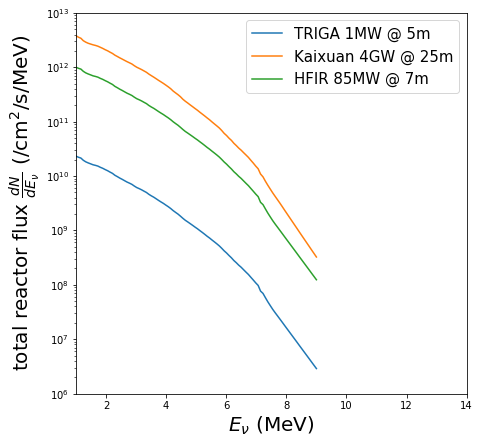

In [5]:
# Plot the three different fluxes at different distances

fig, ax = plt.subplots(figsize=(7,7))

# function that takes the distance from the reactor (in metres) and returns a normalisation factor (in cm^-2)
def flux_norm(L):
    return 1/(4*np.pi*(100*L)**2)

ax.plot(TRIGA_flux[0], TRIGA_flux[1]*flux_norm(5), label="TRIGA 1MW @ 5m")
ax.plot(Kaixuan_flux[0], 4*Kaixuan_flux[1]*flux_norm(25), label="Kaixuan 4GW @ 25m")
ax.plot(HFIR_flux[0], HFIR_flux[1]*flux_norm(7), label="HFIR 85MW @ 7m")

ax.set_yscale('log')
ax.set_xlim(1,14)
ax.set_ylim(1e6, 1e13)

ax.set_xlabel(r'$E_\nu$ (MeV)', fontsize=20)
ax.set_ylabel(r'total reactor flux $\frac{dN}{dE_\nu}$ (/cm$^2$/s/MeV)', fontsize=20)

ax.legend(fontsize=15)